<a href="https://colab.research.google.com/github/baesumin/DeepLearning/blob/main/sk%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
import pandas as pd
import numpy as np
import io
MyTrainset = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

In [ ]:
MyTrainset 

,ID,cr_ID,assembly_time,eq_ID,process_time,ramp,servo_defect,data_defect,status
0,HDDSN00000,CRSTR01L,2015-03-09 09:36:00,EGRWT0113,2015-03-09 11:33:55,4561.0,6083.0,1341.0,pass
1,HDDSN00001,CRSTR01Q,2015-03-10 02:13:00,EGRWT0102,2015-03-10 03:16:18,3898.0,1819.0,8037.0,pass
2,HDDSN00002,CRSTR01N,2015-03-06 23:06:00,EGRWT0103,2015-03-07 00:00:12,3016.0,4997.0,1583.0,pass
3,HDDSN00003,CRSTR01A,2015-03-08 05:10:00,EGRWT0107,2015-03-08 06:36:18,1605.0,4415.0,3345.0,pass
4,HDDSN00004,CRSTR01C,2015-03-09 06:44:00,EGRWT0113,2015-03-09 09:13:40,1002.0,2394.0,3296.0,pass
...,...,...,...,...,...,...,...,...,...
31995,HDDSN39991,CRSTR01Q,2015-03-08 06:02:00,EGRWT0110,2015-03-08 07:31:54,1303.0,2796.0,2057.0,pass
31996,HDDSN39993,CRSTR01O,2015-03-07 13:06:00,EGRWT0102,2015-03-07 14:03:08,3036.0,5538.0,2382.0,fail
31997,HDDSN39994,CRSTR01C,2015-03-08 16:14:00,EGRWT0108,2015-03-08 18:55:56,2954.0,3607.0,3133.0,fail
31998,HDDSN39997,CRSTR01T,2015-03-05 13:11:00,EGRWT0109,2015-03-05 15:21:58,1133.0,3279.0,2410.0,pass


In [3]:
df_x = MyTrainset.loc[:,(MyTrainset.columns != 'status') & (MyTrainset.columns != 'ID') & (MyTrainset.columns != 'cr_ID') & (MyTrainset.columns != 'eq_ID')& (MyTrainset.columns != 'assembly_time')& (MyTrainset.columns != 'process_time')]
df_y = MyTrainset.loc[:,'status']

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
cr_ID = MyTrainset.loc[:,'cr_ID']
encoder.fit(cr_ID)
cr_ID = encoder.transform(cr_ID)
cr_ID = pd.DataFrame(cr_ID)
cr_ID.columns = ['cr_ID']

In [6]:
eq_ID = MyTrainset.loc[:,'eq_ID']
encoder.fit(eq_ID)
eq_ID = encoder.transform(eq_ID)
eq_ID = pd.DataFrame(eq_ID)
eq_ID.columns = ['eq_ID']

In [7]:
assembly_time = MyTrainset.loc[:,'assembly_time']

In [8]:
process_time = MyTrainset.loc[:,'process_time']

In [9]:
assembly_time = pd.to_datetime(assembly_time, format="%Y/%m/%d %H:%M:%S")
process_time = pd.to_datetime(process_time, format="%Y/%m/%d %H:%M:%S")

In [10]:
from datetime import datetime

In [11]:
generalTime = datetime(2015,3,1,0,0,0)
print(generalTime)

2015-03-01 00:00:00


In [12]:
m_assembly_time = assembly_time - generalTime
m_assembly_time = m_assembly_time.dt.days*86400+m_assembly_time.dt.seconds
m_assembly_time = pd.DataFrame(m_assembly_time)
m_assembly_time.columns = ['m_assembly_time']

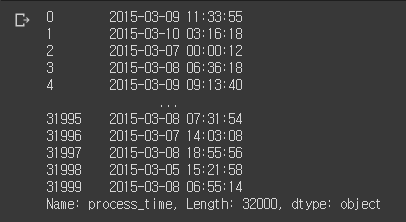

In [13]:
m_process_time = process_time - generalTime
m_process_time = m_process_time.dt.days*86400+m_process_time.dt.seconds
m_process_time = pd.DataFrame(m_process_time)
m_process_time.columns = ['m_process_time']

In [14]:
timeDiffer = process_time - assembly_time
timeDiffer = timeDiffer.dt.seconds
timeDiffer = pd.DataFrame(timeDiffer)
timeDiffer.columns = ['timeDiffer']

In [15]:
df_x = pd.concat([df_x,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time], axis=1)
df_x

,ramp,servo_defect,data_defect,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time
0,4561.0,6083.0,1341.0,11,13,7075,725760,732835
1,3898.0,1819.0,8037.0,16,2,3798,785580,789378
2,3016.0,4997.0,1583.0,13,3,3252,515160,518412
3,1605.0,4415.0,3345.0,0,7,5178,623400,628578
4,1002.0,2394.0,3296.0,2,13,8980,715440,724420
...,...,...,...,...,...,...,...,...
31995,1303.0,2796.0,2057.0,16,10,5394,626520,631914
31996,3036.0,5538.0,2382.0,14,2,3428,565560,568988
31997,2954.0,3607.0,3133.0,2,8,9716,663240,672956
31998,1133.0,3279.0,2410.0,19,9,7858,393060,400918


In [16]:
pro_wday = pd.to_datetime(MyTrainset['process_time'])
ass_wday = pd.to_datetime(MyTrainset['assembly_time'])

In [17]:
#df_x['pro_day'] = [1 if pd.to_datetime(date).hour <= 12 else 0 for date in MyTrainset['process_time']] 
#df_x['ass_day'] = [1 if pd.to_datetime(date).hour <= 12 else 0 for date in MyTrainset['assembly_time']]
# 오전 = 1 / 오후 = 0

# df_x['pro_wday'] = [date.weekday() for date in MyTrainset['process_time']] 
# df_x['ass_wday'] = [date.weekday() for date in MyTrainset['assembly_time']] 

df_x['pro_wday'] = pro_wday.dt.weekday
df_x['ass_wday'] = ass_wday.dt.weekday
# 요일 -> 0 :월요일
df_x

,ramp,servo_defect,data_defect,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time,pro_wday,ass_wday
0,4561.0,6083.0,1341.0,11,13,7075,725760,732835,0,0
1,3898.0,1819.0,8037.0,16,2,3798,785580,789378,1,1
2,3016.0,4997.0,1583.0,13,3,3252,515160,518412,5,4
3,1605.0,4415.0,3345.0,0,7,5178,623400,628578,6,6
4,1002.0,2394.0,3296.0,2,13,8980,715440,724420,0,0
...,...,...,...,...,...,...,...,...,...,...
31995,1303.0,2796.0,2057.0,16,10,5394,626520,631914,6,6
31996,3036.0,5538.0,2382.0,14,2,3428,565560,568988,5,5
31997,2954.0,3607.0,3133.0,2,8,9716,663240,672956,6,6
31998,1133.0,3279.0,2410.0,19,9,7858,393060,400918,3,3


In [89]:
df_x['defectSum'] = df_x['servo_defect'] + df_x['data_defect']
df_x

,ramp,servo_defect,data_defect,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time,pro_wday,ass_wday,defectSum
0,4561.0,6083.0,1341.0,11,13,7075,725760,732835,0,0,7424.0
1,3898.0,1819.0,8037.0,16,2,3798,785580,789378,1,1,9856.0
2,3016.0,4997.0,1583.0,13,3,3252,515160,518412,5,4,6580.0
3,1605.0,4415.0,3345.0,0,7,5178,623400,628578,6,6,7760.0
4,1002.0,2394.0,3296.0,2,13,8980,715440,724420,0,0,5690.0
...,...,...,...,...,...,...,...,...,...,...,...
31995,1303.0,2796.0,2057.0,16,10,5394,626520,631914,6,6,4853.0
31996,3036.0,5538.0,2382.0,14,2,3428,565560,568988,5,5,7920.0
31997,2954.0,3607.0,3133.0,2,8,9716,663240,672956,6,6,6740.0
31998,1133.0,3279.0,2410.0,19,9,7858,393060,400918,3,3,5689.0


In [109]:
df_x['a'] = df_x['servo_defect'] * df_x['data_defect']
df_x

,ramp,servo_defect,data_defect,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time,pro_wday,ass_wday,defectSum,defectDiffer,a
0,4561.0,6083.0,1341.0,11,13,7075,725760,732835,0,0,7424.0,1,8157303.0
1,3898.0,1819.0,8037.0,16,2,3798,785580,789378,1,1,9856.0,0,14619303.0
2,3016.0,4997.0,1583.0,13,3,3252,515160,518412,5,4,6580.0,1,7910251.0
3,1605.0,4415.0,3345.0,0,7,5178,623400,628578,6,6,7760.0,1,14768175.0
4,1002.0,2394.0,3296.0,2,13,8980,715440,724420,0,0,5690.0,0,7890624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,1303.0,2796.0,2057.0,16,10,5394,626520,631914,6,6,4853.0,1,5751372.0
31996,3036.0,5538.0,2382.0,14,2,3428,565560,568988,5,5,7920.0,1,13191516.0
31997,2954.0,3607.0,3133.0,2,8,9716,663240,672956,6,6,6740.0,1,11300731.0
31998,1133.0,3279.0,2410.0,19,9,7858,393060,400918,3,3,5689.0,1,7902390.0


In [115]:
del df_x['a']
df_x

,ramp,servo_defect,data_defect,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time,pro_wday,ass_wday,defectSum,defectDiffer
0,4561.0,6083.0,1341.0,11,13,7075,725760,732835,0,0,7424.0,1
1,3898.0,1819.0,8037.0,16,2,3798,785580,789378,1,1,9856.0,0
2,3016.0,4997.0,1583.0,13,3,3252,515160,518412,5,4,6580.0,1
3,1605.0,4415.0,3345.0,0,7,5178,623400,628578,6,6,7760.0,1
4,1002.0,2394.0,3296.0,2,13,8980,715440,724420,0,0,5690.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31995,1303.0,2796.0,2057.0,16,10,5394,626520,631914,6,6,4853.0,1
31996,3036.0,5538.0,2382.0,14,2,3428,565560,568988,5,5,7920.0,1
31997,2954.0,3607.0,3133.0,2,8,9716,663240,672956,6,6,6740.0,1
31998,1133.0,3279.0,2410.0,19,9,7858,393060,400918,3,3,5689.0,1


In [90]:
defectDiffer = pd.DataFrame(index=range(0,32000),columns=['defectDiffer'])
defectDiffer.iloc[:,0]=1
tmp = df_x['servo_defect'] - df_x['data_defect']>0
for i in range(0,32000):
  if tmp[i]==True:
    defectDiffer.iloc[i,0] = 1
  else:
    defectDiffer.iloc[i,0] = 0
df_x['defectDiffer'] = defectDiffer
df_x

,ramp,servo_defect,data_defect,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time,pro_wday,ass_wday,defectSum,defectDiffer
0,4561.0,6083.0,1341.0,11,13,7075,725760,732835,0,0,7424.0,1
1,3898.0,1819.0,8037.0,16,2,3798,785580,789378,1,1,9856.0,0
2,3016.0,4997.0,1583.0,13,3,3252,515160,518412,5,4,6580.0,1
3,1605.0,4415.0,3345.0,0,7,5178,623400,628578,6,6,7760.0,1
4,1002.0,2394.0,3296.0,2,13,8980,715440,724420,0,0,5690.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31995,1303.0,2796.0,2057.0,16,10,5394,626520,631914,6,6,4853.0,1
31996,3036.0,5538.0,2382.0,14,2,3428,565560,568988,5,5,7920.0,1
31997,2954.0,3607.0,3133.0,2,8,9716,663240,672956,6,6,6740.0,1
31998,1133.0,3279.0,2410.0,19,9,7858,393060,400918,3,3,5689.0,1


In [22]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier, plot_importance
from xgboost import XGBClassifier #
from sklearn.model_selection import StratifiedKFold, KFold #
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp

# 초모수 탐색공간 정의
param_space = {'n_estimators' : hp.quniform('n_estimators', 10, 100, 1),
               'num_leaves': hp.quniform('num_leaves', 10, 100, 1),
               'subsample': hp.uniform('subsample', 0.5, 1),
               'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
               'learning_rate' : hp.quniform('learning_rate',0.01,0.1, 0.0001)
              }

# 목적함수 정의
def objective(params):
    params = {'n_estimators' : int(params['n_estimators']),
              'num_leaves': int(params['num_leaves']),
              'subsample': params['subsample'],
              'colsample_bytree' : params['colsample_bytree'],
              'learing_rate' : params['learning_rate']
             }
        
    xgb_clf = LGBMClassifier(**params, n_jobs = -1) 
    best_score = cross_val_score(xgb_clf, df_x, df_y, 
                                 scoring='accuracy', 
                                 cv=5, 
                                 n_jobs=-1).mean()
    
#     xgb_clf.fit(x_train,y_train, eval_set = (x_train,x_valid), early_stopping_rounds = 30)
#     best_score = xgb_clf.score(x_train, x_valid)
    
    loss = 1 - best_score
    return loss


# 알고리즘 실행
best = fmin(fn=objective, space=param_space, 
            max_evals=10, 
            rstate=np.random.RandomState(777), 
            algo=tpe.suggest)
print(best)

100%|██████████| 10/10 [00:13<00:00,  1.39s/it, best loss: 0.08428125000000009]
{'colsample_bytree': 0.9211260413085757, 'learning_rate': 0.083, 'n_estimators': 53.0, 'num_leaves': 46.0, 'subsample': 0.5956166481249425}


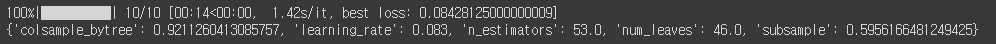

In [198]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=10,shuffle=True)

In [199]:
t1 = []
t2 = []
t3 = []
t4 = []
t5 = []
t6 = []
t7 = []
t8 = []
t9 = []
t10 = []
t11 = []
t12 = []
t13 = []
t14 = []
t15 = []
te1 = []
te2 = []
te3 = []
te4 = []
te5 = []
te6 = []
te7 = []
te8 = []
te9 = []
te10 = []
te11 = []
te12 = []
te13 = []
te14 = []
te15 = []

In [200]:
i = 0
acc = np.zeros(10)
best_train_x = []
best_test_x = []
best_train_y = []
best_test_y = []
max = 0

for train_index, test_index in kf.split(df_x):
    #print("fold:", i)
    #print(len(train_index))
    train_x, test_xx = df_x.iloc[train_index,:], df_x.iloc[test_index,:]
    #train_x, test_x = x_scaled[train_index,:], x_scaled[test_index,:]   
    train_y, test_y = df_y[train_index], df_y[test_index]
    model.fit(train_x, train_y)
    pred_y = model.predict(test_xx)
    acc[i] = accuracy_score(test_y, pred_y)
    print(acc[i])
    # if max<acc[i]:
    #   max = acc[i]
    #   best_train_x = train_x
    #   best_test_x = test_x
    #   best_train_y = train_y
    #   best_test_y = test_y
    if i==0:
      t1 = train_x
      te1 = train_y
    elif i==1:
      t2 = train_x
      te2 = train_y
    elif i==2:
      t3 = train_x
      te3 = train_y
    elif i==3:
      t4 = train_x
      te4 = train_y
    elif i==4:
      t5 = train_x
      te5 = train_y
    elif i==5:
      t6 = train_x
      te6 = train_y
    elif i==6:
      t7 = train_x
      te7 = train_y
    elif i==7:
      t8 = train_x
      te8 = train_y
    elif i==8:
      t9 = train_x
      te9 = train_y
    elif i==9:
      t10 = train_x
      te10 = train_y
    elif i==10:
      t11 = train_x
      te11 = train_y
    elif i==11:
      t12 = train_x
      te12 = train_y
    elif i==12:
      t13 = train_x
      te13 = train_y
    elif i==13:
      t14 = train_x
      te14 = train_y
    else:
      t15 = train_x
      te15 = train_y
    i+=1
print("10 fold :", acc)
print("mean accuracy :", np.mean(acc))
print(max)

0.9265625
0.9078125
0.91625
0.915
0.9178125
0.9146875
0.9146875
0.9159375
0.9159375
0.918125
10 fold : [0.9265625 0.9078125 0.91625   0.915     0.9178125 0.9146875 0.9146875
 0.9159375 0.9159375 0.918125 ]
mean accuracy : 0.9162812499999999
0


In [219]:
model.fit(t10, te10)
pred_y = model.predict(test_x)
len(pred_y)

8000

In [220]:
pred_y = pd.DataFrame(pred_y)
pred_y.to_csv("배수민.csv", index = False, header = False)

In [116]:
results = []
names = []
scoring = 'accuracy'
models = []
#models.append(('RF', RandomForestClassifier()))
models.append(('LGBM',LGBMClassifier(colsample_bytree= 0.9211260413085757, learning_rate= 0.083, n_estimators= 53, num_leaves= 46, subsample= 0.5956166481249425)))
#models.append(('XGB',XGBClassifier()))
#models.append(('lr',LogisticRegression()))
#models.append(('cb',CatBoostClassifier()))
for name, model in models:
  kfold= model_selection.KFold(n_splits=5, shuffle=False)
  cv_results= model_selection.cross_val_score(model, df_x, df_y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
  print(msg)
#colsample_bytree= 0.9211260413085757, learning_rate= 0.08, n_estimators= 53, num_leaves= 46, subsample= 0.5956166481249425

LGBM: 0.915469 (0.002154)


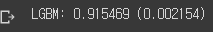

image.png

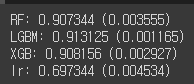

In [ ]:
from scipy.stats import mode

In [ ]:
def get_stacking_data(model, X_train, y_train, X_test, n_folds=5):
  kfold = KFold(n_splits = n_folds)

  train_fold_predict = np.zeros((X_train.shape[0], 1),str)
  
  test_predict = np.zeros((X_test.shape[0], n_folds),str)
  print("model : ", model.__class__.__name__)

  for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
    X_train_ = X_train.iloc[train_index]
    y_train_ = y_train.iloc[train_index]
    X_validation = X_train.iloc[valid_index]

    
    #학습
    model.fit(X_train_, y_train_)
    
    #해당 폴드에서 학습된 모델에다가 검증 데이터(X_validaton)로 예측 후 저장
    train_fold_predict[valid_index, :] = model.predict(X_validation).reshape(-1, 1)
    
    #해당 폴드에서 생성된 모델에게 원본 테스트 데이터(X_test)를 이용해서 예측을 수행하고 저장
    test_predict[:, cnt] = model.predict(X_test)
  #print(test_predict.shape)
  #print(test_predict)
  tmp = np.zeros((len(test_predict),1),str)
  
  for i in range(0,len(test_predict)):
    tmp[i] = mode(test_predict[i])[0]
  print(tmp.shape)
  #for문이 끝나면 test_pred는 평균을 내서 하나로 합친다.
  test_predict_mean = tmp

  return train_fold_predict, test_predict_mean

In [ ]:
#rf_train, rf_test = get_stacking_data(RandomForestClassifier(), df_x, df_y, test_x)
#xgb_train, xgb_test = get_stacking_data(XGBClassifier(), df_x, df_y, test_x)
lgbm_train, lgbm_test = get_stacking_data(LGBMClassifier(), df_x, df_y, test_x)

model :  LGBMClassifier
(8000, 1)


In [ ]:
lgbm_test = pd.DataFrame(lgbm_test)
lgbm_test

,0
0,p
1,p
2,p
3,p
4,f
...,...
7995,p
7996,f
7997,p
7998,f


In [ ]:
for i in range(0,8000):
  if lgbm_test.iloc[i,0] == 'p':
      lgbm_test.iloc[i,0] = "pass"
  else:
      lgbm_test.iloc[i,0] = "fail"
lgbm_test

,0
0,pass
1,pass
2,pass
3,pass
4,fail
...,...
7995,pass
7996,fail
7997,pass
7998,fail


In [ ]:
new_X_train = np.concatenate((rf_train, xgb_train, lgbm_train), axis = 1)
new_X_test = np.concatenate((rf_test, xgb_test, lgbm_test), axis = 1)

In [ ]:
new_X_test = pd.DataFrame(new_X_test)
new_X_test

,0,1,2
0,p,p,p
1,p,p,p
2,p,p,p
3,p,p,p
4,f,f,f
...,...,...,...
7995,p,p,p
7996,f,f,f
7997,p,p,p
7998,f,f,f


In [ ]:
for i in range(0,3):
  for j in range(8000):
    if new_X_test[i][j] == 'p':
      new_X_test[i][j] = "pass"
    else:
      new_X_test[i][j] = "fail"
new_X_test

,0,1,2
0,pass,pass,pass
1,pass,pass,pass
2,pass,pass,pass
3,pass,pass,pass
4,fail,fail,fail
...,...,...,...
7995,pass,pass,pass
7996,fail,fail,fail
7997,pass,pass,pass
7998,fail,fail,fail


In [ ]:
result = pd.DataFrame(index=range(0,8000),columns=['status'])
#result[0] = 'pass'
type(result)

pandas.core.frame.DataFrame

In [ ]:
result = pd.DataFrame(index=range(0,8000),columns=['status'])
for i in range(0,8000):
  result.iloc[i] = mode(new_X_test.iloc[i,:])[0]
result

,status
0,pass
1,pass
2,pass
3,pass
4,fail
...,...
7995,pass
7996,fail
7997,pass
7998,fail


In [ ]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [117]:
uploaded = files.upload()

Saving test.csv to test.csv


In [118]:
testset = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

In [ ]:
testset

,ID,cr_ID,assembly_time,eq_ID,process_time,ramp,servo_defect,data_defect
0,HDDSN00014,CRSTR01A,2015-03-08 11:47:00,EGRWT0107,2015-03-08 12:13:12,1518.0,5784.0,1620.0
1,HDDSN00020,CRSTR01O,2015-03-11 10:14:00,EGRWT0113,2015-03-11 12:03:49,1070.0,4998.0,3565.0
2,HDDSN00021,CRSTR01P,2015-03-08 04:32:00,EGRWT0104,2015-03-08 05:20:31,1008.0,3812.0,2760.0
3,HDDSN00025,CRSTR01I,2015-03-09 19:13:00,EGRWT0114,2015-03-09 20:37:23,1041.0,5628.0,1349.0
4,HDDSN00029,CRSTR01R,2015-03-07 17:33:00,EGRWT0111,2015-03-07 18:16:33,2150.0,4150.0,3704.0
...,...,...,...,...,...,...,...,...
7995,HDDSN39990,CRSTR01F,2015-03-10 05:54:00,EGRWT0114,2015-03-10 07:42:16,1163.0,3712.0,5631.0
7996,HDDSN39992,CRSTR01O,2015-03-05 08:07:00,EGRWT0100,2015-03-05 09:38:56,1028.0,4102.0,5473.0
7997,HDDSN39995,CRSTR01J,2015-03-11 03:24:00,EGRWT0113,2015-03-11 04:55:11,1202.0,5214.0,2631.0
7998,HDDSN39996,CRSTR01B,2015-03-07 10:42:00,EGRWT0113,2015-03-07 12:46:48,2400.0,5133.0,7505.0


In [166]:
test_x = testset.loc[:,(testset.columns != 'ID') & (testset.columns != 'cr_ID') & (testset.columns != 'eq_ID')& (testset.columns != 'assembly_time')& (testset.columns != 'process_time')]
test_cr_ID = testset.loc[:,'cr_ID']

encoder.fit(test_cr_ID)
test_cr_ID = encoder.transform(test_cr_ID)
test_cr_ID = pd.DataFrame(test_cr_ID)
test_cr_ID.columns = ['cr_ID']

test_eq_ID = testset.loc[:,'eq_ID']
encoder.fit(test_eq_ID)
test_eq_ID = encoder.transform(test_eq_ID)
test_eq_ID = pd.DataFrame(test_eq_ID)
test_eq_ID.columns = ['eq_ID']

test_assembly_time = testset.loc[:,'assembly_time']
test_process_time = testset.loc[:,'process_time']

test_assembly_time = pd.to_datetime(test_assembly_time, format="%Y/%m/%d %H:%M:%S")
test_process_time = pd.to_datetime(test_process_time, format="%Y/%m/%d %H:%M:%S")

test_m_assembly_time = test_assembly_time - generalTime
test_m_assembly_time = test_m_assembly_time.dt.days*86400+test_m_assembly_time.dt.seconds
test_m_assembly_time = pd.DataFrame(test_m_assembly_time)
test_m_assembly_time.columns = ['m_assembly_time']

test_m_process_time = test_process_time - generalTime
test_m_process_time = test_m_process_time.dt.days*86400+test_m_process_time.dt.seconds
test_m_process_time = pd.DataFrame(test_m_process_time)
test_m_process_time.columns = ['m_process_time']

test_timeDiffer = test_process_time - test_assembly_time
test_timeDiffer = test_timeDiffer.dt.seconds
test_timeDiffer = pd.DataFrame(test_timeDiffer)
test_timeDiffer.columns = ['timeDiffer']

test_x = pd.concat([test_x,test_cr_ID,test_eq_ID,test_timeDiffer,test_m_assembly_time,test_m_process_time], axis=1)

test_pro_wday = pd.to_datetime(testset['process_time'])
test_ass_wday = pd.to_datetime(testset['assembly_time'])
test_x['pro_wday'] = test_pro_wday.dt.weekday
test_x['ass_wday'] = test_ass_wday.dt.weekday

test_x['defectSum'] = test_x['servo_defect'] + test_x['data_defect']

test_defectDiffer = pd.DataFrame(index=range(0,32000),columns=['defectDiffer'])
test_defectDiffer.iloc[:,0]=1
tmp = test_x['servo_defect'] - test_x['data_defect']>0
for i in range(0,8000):
  if tmp[i]==True:
    test_defectDiffer.iloc[i,0] = 1
  else:
    test_defectDiffer.iloc[i,0] = 0
test_x['defectDiffer'] = test_defectDiffer

In [120]:
df_x

,ramp,servo_defect,data_defect,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time,pro_wday,ass_wday,defectSum,defectDiffer
0,4561.0,6083.0,1341.0,11,13,7075,725760,732835,0,0,7424.0,1
1,3898.0,1819.0,8037.0,16,2,3798,785580,789378,1,1,9856.0,0
2,3016.0,4997.0,1583.0,13,3,3252,515160,518412,5,4,6580.0,1
3,1605.0,4415.0,3345.0,0,7,5178,623400,628578,6,6,7760.0,1
4,1002.0,2394.0,3296.0,2,13,8980,715440,724420,0,0,5690.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31995,1303.0,2796.0,2057.0,16,10,5394,626520,631914,6,6,4853.0,1
31996,3036.0,5538.0,2382.0,14,2,3428,565560,568988,5,5,7920.0,1
31997,2954.0,3607.0,3133.0,2,8,9716,663240,672956,6,6,6740.0,1
31998,1133.0,3279.0,2410.0,19,9,7858,393060,400918,3,3,5689.0,1


In [121]:
test_x

,ramp,servo_defect,data_defect,cr_ID,eq_ID,timeDiffer,m_assembly_time,m_process_time,pro_wday,ass_wday,defectSum,defectDiffer
0,1518.0,5784.0,1620.0,0,7,1572,647220,648792,6,6,7404.0,1
1,1070.0,4998.0,3565.0,14,13,6589,900840,907429,2,2,8563.0,1
2,1008.0,3812.0,2760.0,15,4,2911,621120,624031,6,6,6572.0,1
3,1041.0,5628.0,1349.0,8,14,5063,760380,765443,0,0,6977.0,1
4,2150.0,4150.0,3704.0,17,11,2613,581580,584193,5,5,7854.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1163.0,3712.0,5631.0,5,14,6496,798840,805336,1,1,9343.0,0
7996,1028.0,4102.0,5473.0,14,0,5516,374820,380336,3,3,9575.0,0
7997,1202.0,5214.0,2631.0,9,13,5471,876240,881711,2,2,7845.0,1
7998,2400.0,5133.0,7505.0,1,13,7488,556920,564408,5,5,12638.0,0


In [ ]:
model = LGBMClassifier(colsample_bytree= 0.9211260413085757, learning_rate= 0.083, n_estimators= 53, num_leaves= 46, subsample= 0.5956166481249425)
model.fit(df_x, df_y)
pred_y = model.predict(test_x)
pred_y = pd.DataFrame(pred_y)

In [ ]:
pred_y = pd.DataFrame(pred_y)

In [ ]:
pred_y.to_csv("배수민.csv", index = False, header = False)